<a href="https://colab.research.google.com/github/Anantika0410/Mini-Project/blob/main/test7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn seaborn tensorflow


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout


In [ ]:
# Load CSVs
train_df = pd.read_csv('/content/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/mitbih_test.csv', header=None)

# Combine and clean
df = pd.concat([train_df, test_df], axis=0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

# Features and labels
X = df.iloc[:, :-1].values.astype(np.float32)
y = df.iloc[:, -1].astype(int).values

# Normalize features
X /= np.max(X)

# Reshape for CNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Classes in y_train:", np.unique(y_train, return_counts=True))
print("✅ Classes in y_test:", np.unique(y_test, return_counts=True))


✅ Classes in y_train: (array([0, 1, 2, 3, 4]), array([72471,  2223,  5789,   642,  6431]))
✅ Classes in y_test: (array([0, 1, 2, 3, 4]), array([18118,   556,  1447,   161,  1608]))


In [ ]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Dropout(0.3)
])

model.summary()

# Extract features (no need to compile for feature extraction)
train_features = model.predict(X_train, verbose=1)
test_features = model.predict(X_test, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 185, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 90, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,360 (153.75 KB)

 Trainable params: 39,360 (153.75 KB)

 Non-trainable params: 0 (0.00 B)

2737/2737 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


In [ ]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(train_features, y_train)
y_pred = svm.predict(test_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8360


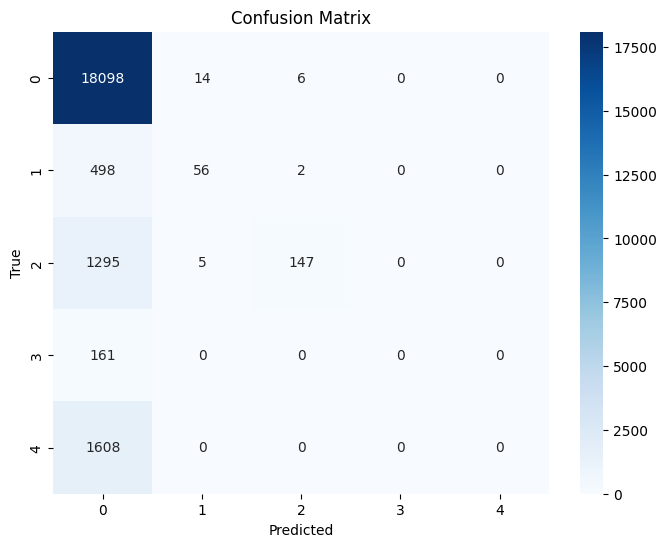

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     18118
           1       0.75      0.10      0.18       556
           2       0.95      0.10      0.18      1447
           3       0.00      0.00      0.00       161
           4       0.00      0.00      0.00      1608

    accuracy                           0.84     21890
   macro avg       0.51      0.24      0.25     21890
weighted avg       0.77      0.84      0.77     21890



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))
